In [213]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pickle
import itertools
import nltk
from collections import Counter
from nltk.corpus import brown
nltk.download('stopwords')
nltk.download('brown')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elisilkov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /Users/elisilkov/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [214]:
PP_recipes = pd.read_csv('PP_recipes.csv')
RAW_recipes = pd.read_csv('RAW_recipes.csv')
RAW_interactions = pd.read_csv('RAW_interactions.csv')
PP_users = pd.read_csv('PP_users.csv')

#examine outlier
RAW_recipes[RAW_recipes['minutes'] == RAW_recipes['minutes'].max()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8


In [215]:
#let's focus this part of analysis on raw_recipes
RAW_recipes.head(20)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


In [216]:
#remove outliers. 2 rounds of outlier removals since we are stil seeing some
# Unreasonable values after first round. Drop na values
full_length = len(RAW_recipes)
for i in range(2):
    RAW_recipes = RAW_recipes[(np.abs(stats.zscore(RAW_recipes['minutes'])) < 2)]
RAW_recipes = RAW_recipes.dropna()
print('Removed ' + str(full_length - len(RAW_recipes)) + ' elements')

Removed 5282 elements


In [241]:
# Let's first examine the recipes dataset
nRow, nCol = RAW_recipes.shape
print(f'There are {nRow} rows and {nCol} columns')
RAW_recipes.head()
print('The average preparation time is ' + str(RAW_recipes['minutes'].mean()) + ' minutes')

There are 226355 rows and 18 columns
The average preparation time is 79.54049612334607 minutes


In [218]:
RAW_recipes['minutes'].max()

6000

In [219]:
#split preparation time into bins
time_labels = ['<15 min', '16-30 min', '30-45 min', '45-60 min', '1-1.5 hrs', '1.5-2 hrs', '2-4 hrs', '>4 hrs']
RAW_recipes['time bin']=pd.cut(RAW_recipes['minutes'], [-1, 15, 30, 45, 60, 90, 120, 240, 6000], labels=time_labels)


<BarContainer object of 8 artists>

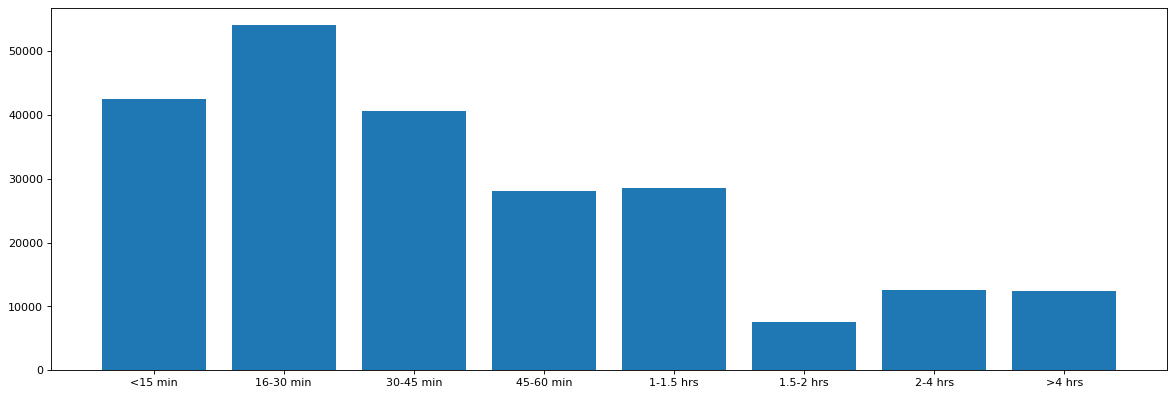

In [220]:
#examine distribution of preparation time
figure(figsize=(18, 6), dpi=80)
plt.bar(RAW_recipes.groupby(['time bin'])['name'].count().index, RAW_recipes.groupby(['time bin'])['name'].count())

In [236]:
#create intermediate df to store ingredient counts after removing outliers
lst = [e[1:-1] + ', ' for e in PP_recipes['ingredient_ids'].tolist()] 
lst
exec('ingredients = [' + ''.join(lst) + ']')
ingredients_df = pd.DataFrame(ingredients, columns=['id'])
df = pd.DataFrame(ingredients_df.groupby(['id'])['id'].count().sort_values(ascending=False))
df.columns=['count']

,count
id,
6270,66483
840,43970
5010,39143
2499,39064
6906,33884
...,...
336,1
931,1
2732,1


In [223]:
#ingredient mapping
ingredient_mapping = pd.read_pickle('ingr_map.pkl')
ingredient_mapping

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
...,...,...,...,...,...,...,...
11654,soybeans,1,soybean,7,soybean,31,6702
11655,goose,1,goose,5,goose,8,3318
11656,ajwain,1,ajwain,6,ajwain,13,47
11657,brinjals,1,brinjal,7,brinjal,2,750


In [237]:
#dataframe of top ingredients and share of recipes in which they are present.
counts = ingredient_mapping.join(df, on='id', lsuffix=' pkl', rsuffix=' preprocessed')
counts.sort_values(by='count preprocessed', ascending=False, inplace=True)
counts.drop_duplicates(['processed'], inplace=True)
counts

no_recipes = len(RAW_recipes)
counts['share of recipes w ing.'] = counts['count preprocessed'] / no_recipes
sum_of_ingredients = counts['count preprocessed'].sum()
sum_of_100_ingredients = counts.head(100)['count preprocessed'].sum()
print('Top 100 ingredients represent ' + str(round(sum_of_100_ingredients / sum_of_ingredients * 100)) + '% of ingredient frequency')
counts

Top 100 ingredients represent 33% of ingredient frequency


,raw_ingr,raw_words,processed,len_proc,replaced,count pkl,id,count preprocessed,share of recipes w ing.
904,salt,1,salt,4,salt,72848,6270,66483.0,0.293711
6660,low-fat butter,2,butter,6,butter,48039,840,43970.0,0.194252
10567,durkee onions,2,onion,5,onion,42631,5010,39143.0,0.172927
10968,eggs,1,egg,3,egg,43350,2499,39064.0,0.172578
11018,sugar,1,sugar,5,sugar,37464,6906,33884.0,0.149694
...,...,...,...,...,...,...,...,...,...
9942,bean sauce,2,bean sauce,10,bean sauce,2,404,NaN,NaN
10597,pork roll,2,pork roll,9,pork roll,2,5606,NaN,NaN
11243,scungilli,1,scungilli,9,scungilli,2,6347,NaN,NaN
11508,kashk,1,kashk,5,kashk,2,4036,NaN,NaN


In [243]:
#examine most frequent words in recipe names
top_N = 1000

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (RAW_recipes.name
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)




# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

#TODO - add pos tagging and count most frequent nouns

rslt

print('Top 100 words represent ' + str(rslt['Frequency'].head(100).sum() / rslt['Frequency'].sum()))

Top 100 words represent 0.493486197222126


<BarContainer object of 94 artists>

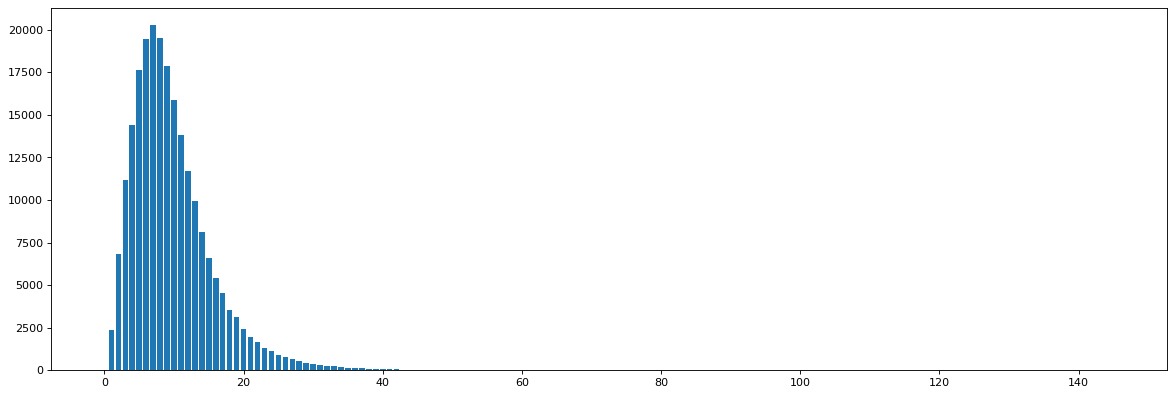

In [228]:
#lets switch gears and look at number of steps vs number of recipes for that step amount

figure(figsize=(18, 6), dpi=80)
x1 = RAW_recipes.groupby(['n_steps'])['name'].count().index
x2 = RAW_recipes.groupby(['n_steps'])['name'].count()
plt.title('Number of steps vs. Number of recipes')
plt.bar(RAW_recipes.groupby(['n_steps'])['name'].count().index, RAW_recipes.groupby(['n_steps'])['name'].count())

#We see hat most recipes fall between 0 and 20 steps, with significant right skew

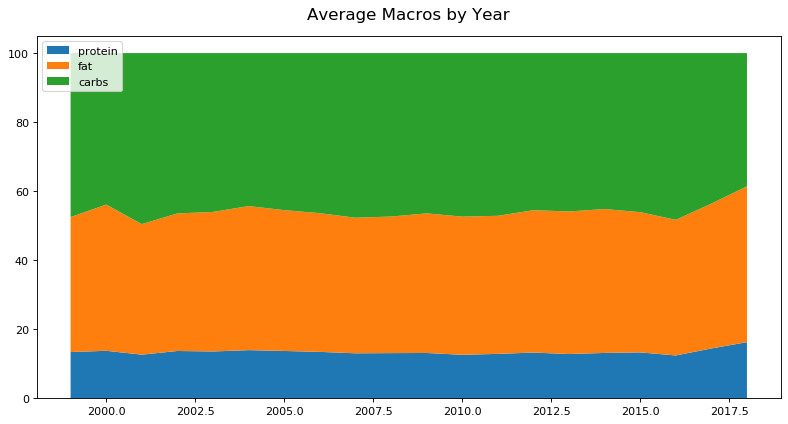

In [229]:
#lets look at how average distribution of macros changed over time. Not sure that this adds
#value to the modelling aspect, but interesting nonetheless
fat_dv = 78
protein_dv = 50
cal_fat = 9
cal_protein = 4

def carbs_prot_fat(n_vector):
    to_list = n_vector[1:-1].split(',')
    output = list(map(float, to_list))
    tot_cal = output[0]
    pdv_fat = output[1]
    pdv_protein = output[5]
    if tot_cal==0:
        return [np.nan, np.nan, np.nan]
    prot_cont = (protein_dv * cal_protein * pdv_protein) / tot_cal
    fat_cont = (fat_dv * cal_fat * pdv_fat) / tot_cal
    carb_cont = 100-prot_cont-fat_cont
    if carb_cont < 0 or prot_cont > 100 or fat_cont > 100:
        return [np.nan, np.nan, np.nan]
    return [prot_cont, fat_cont, carb_cont]

RAW_recipes['macros'] = RAW_recipes['nutrition'].apply(lambda x: carbs_prot_fat(x))
RAW_recipes['protein']=RAW_recipes['macros'].apply(lambda x: x[0])
RAW_recipes['fat']=RAW_recipes['macros'].apply(lambda x: x[1])
RAW_recipes['carbs']=RAW_recipes['macros'].apply(lambda x: x[2])
RAW_recipes['year'] = RAW_recipes['submitted'].map(lambda x: int(x[0:4]))
RAW_recipes
macros_by_year = RAW_recipes.groupby(['year'])['protein', 'fat', 'carbs'].mean()
macros_by_year
X=np.array(macros_by_year.index)
Y = np.array(macros_by_year[['protein', 'fat', 'carbs']])
Y = np.transpose(Y)

#plot stacked line chart
figure(figsize=(12, 6), dpi=80)
plt.stackplot(X, Y, baseline='zero')
plt.title("Average Macros by Year", pad=15, fontsize=15)
plt.legend(['protein', 'fat', 'carbs'], loc='upper left')
#protein and fat seem to be gaining share in recent years which makes sense given 
#dieting fads and trends

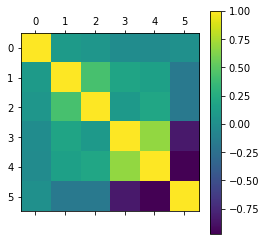

[(0, 'minutes'),
 (1, 'n_steps'),
 (2, 'n_ingredients'),
 (3, 'protein'),
 (4, 'fat'),
 (5, 'carbs')]

In [238]:
#Now that we extracted 3 new numerical features, namely protein, fat and carbs, lets 
#look at the correlation matrix
numerical_attributes = ['minutes', 'n_steps', 'n_ingredients', 'protein', 'fat', 'carbs']
plt.matshow(RAW_recipes[numerical_attributes].corr())
plt.colorbar()
plt.show()
[i for i in (zip(range(6), numerical_attributes))]
#correlations across the dataset are generally weak, with the exception of macros. Note
#that carbs are estimated as a function of protein and fat, so that explains the strong
#negative correlation

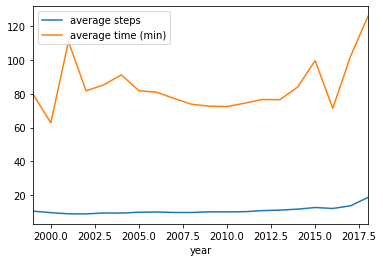

In [239]:
#examine average step size and average time. These seem to both be increasing in recent
#years
average_steps = RAW_recipes.groupby(['year'])['n_steps'].mean()
average_time = RAW_recipes.groupby(['year'])['minutes'].mean()

average_steps.plot.line(x=None, y=None)
average_time.plot.line(x=None, y=None)
plt.legend(['average steps', 'average time (min)'], loc='upper left')

In [ ]:
#todo - breakdown of most popular ingredients by preparation time bin